


#**bbc-news-classification-with-word2vec**




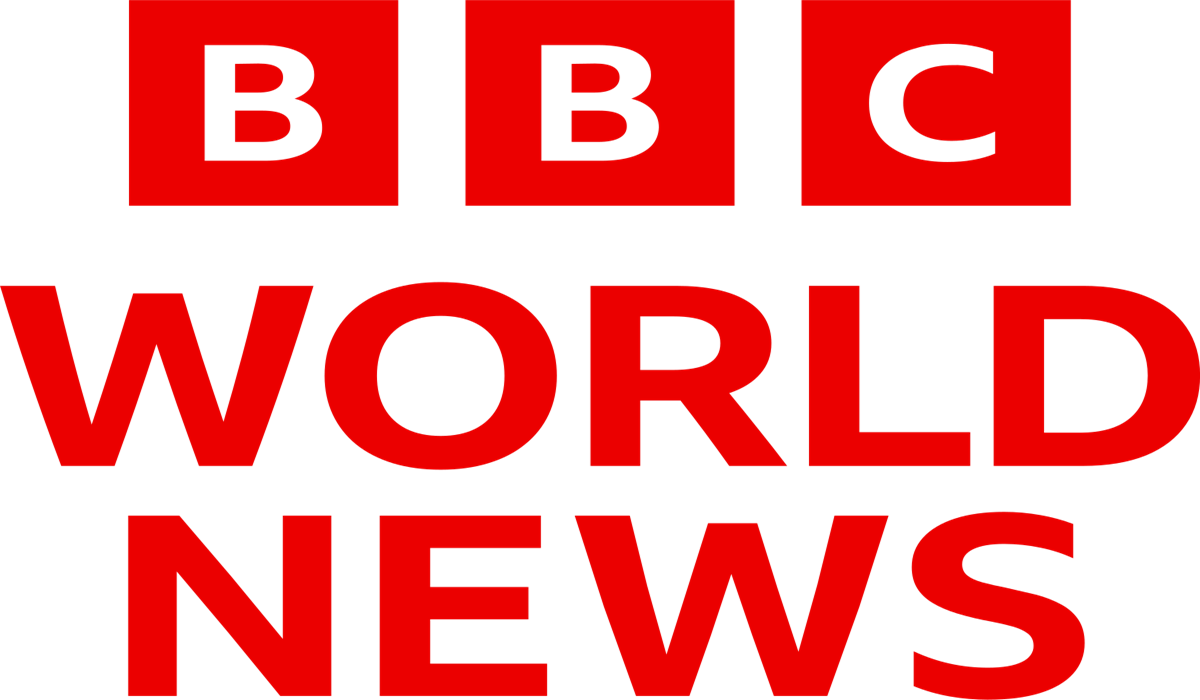

#**📰 BBC News Article Classification using Word2Vec**

In this project, I will classify BBC News articles using two different datasets:

- **`original_data`**: This dataset contains the full text of the BBC News articles along with their corresponding category labels.
- **`data_summary`**: This is a modified version of the original dataset (created in **Reference 2**) that includes each article's text, a text complexity score, and a generated summary.

The classification will be performed using **Word2Vec embeddings**. I will first train a model using the full text from `original_data`. Then, I will repeat the classification using the **summarized version** of the articles from `data_summary`.

The goal of this comparison is to evaluate the impact of text summarization on classification accuracy. Specifically, I want to determine whether using summarized text can **improve** or **worsen** the model’s performance compared to using the full text.


---
### **SUMMARY**

1. [Read The data](#1)
2. [Exploratory Data Analysis](#2)
3. [Text Classification with Word2Vec Embedding plus Classifier](#3)
---

# **1. Read the Data**
<a id="1"></a>

## **📦 Importing Libraries and Setting Up the Environment**

In this section, we import all the necessary Python libraries and modules required for data preprocessing, visualization, model training, and evaluation.

### 🧮 Data Manipulation and Visualization
- `numpy` and `pandas`: For numerical operations and data handling.
- `matplotlib.pyplot` and `seaborn`: For data visualization.
- `pd.set_option('display.max_colwidth', None)`: Ensures that full text is shown in pandas DataFrame outputs without truncation.

### 🤖 Machine Learning Tools
- `train_test_split`: To split data into training and testing sets.
- `LabelEncoder`: To convert categorical labels into numeric form.
- `LogisticRegression` and `RandomForestClassifier`: Classification models used in this project.
- Metrics like `accuracy_score`, `precision_score`, `recall_score`, and `confusion_matrix`: To evaluate model performance.

### 🧠 NLP & Word Embeddings
- `gensim`, `nltk`, `re`, `string`: For natural language processing and text cleaning.
- `stopwords`, `word_tokenize`, `SnowballStemmer`: For text preprocessing such as removing stopwords, tokenization, and stemming.
- `Word2Vec`: Used to convert text into numerical vectors based on word contexts.

### ⚠️ Miscellaneous
- `warnings.filterwarnings("ignore")`: Used to suppress warnings for cleaner output.

With these imports, the environment is now ready for data preprocessing and modeling tasks.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import gensim, string, re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

## **1.1 Original Dataset**

In [6]:
# Original BBC Articles dataset
original_data = pd.read_csv(r'D:\SWAYAM\bbc-news-classification-with-word2vec-main\inputs\bbc_text_cls.csv')

original_data.head()

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

## **📊 Dataset Overview and Cleaning**

We begin by inspecting the structure and cleanliness of the `original_data` dataset.

In [7]:
print(f'The dataset has {original_data.shape[0]} rows ans {original_data.shape[1]} columns.')

The dataset has 2225 rows ans 2 columns.


In [8]:
print(f'The dataset has {original_data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [9]:
print(f'The dataset has {original_data.duplicated().sum()} duplicate values.')

The dataset has 98 duplicate values.


I am dropping the duplicate rows.

In [10]:
original_data.drop_duplicates(inplace=True)

original_data.shape

(2127, 2)

## **1.2 Dataset with Summarized Articles**

## **🧾 Loading the Summarized Dataset**

In this step, we load a modified version of the BBC News dataset that contains summarized versions of each article. This dataset also includes additional metadata such as text complexity scores.

Previewing the first few rows helps us verify the structure and contents of the dataset before using it for classification. This dataset will later be used to compare classification accuracy against the original full-text dataset.


In [11]:
# Dataset with the summarized BBC News articles
data_summary = pd.read_csv(r'D:\SWAYAM\bbc-news-classification-with-word2vec-main\inputs\bbc_news_text_complexity_summarization.csv')

data_summary.head(2)

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business,26,62.17,9.72,"It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue.","Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. Time Warner said on Friday that it now owns 8% of search-engine Google. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn."
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 again

## **🧹 Exploring the Summarized Dataset**

Here, we examine the structure and quality of the summarized dataset.

We check:
- The number of rows and columns,
- The presence of any missing (null) values, and
- The number of duplicate records.

This helps ensure the dataset is clean and suitable for training and evaluation before proceeding further.


In [12]:
print(f'The dataset has {data_summary.shape[0]} rows ans {data_summary.shape[1]} columns.')

The dataset has 2127 rows ans 7 columns.


In [13]:
print(f'The dataset has {data_summary.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [14]:
print(f'The dataset has {data_summary.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


As expected, the two datasets have now the same number of rows.

# **2. Exploratory Data Analysis**
<a id="2"></a>

## 2.1 Distribution of Target Classes

## **📊 Visualizing Class Distribution in the Original Dataset**

This plot shows the distribution of target classes (labels) in the original dataset using a histogram.

Understanding class distribution is crucial for classification tasks. It helps identify whether the dataset is **balanced** or **imbalanced**, which can affect the model's performance. An imbalanced dataset may require techniques such as resampling or class weighting to ensure fair learning.


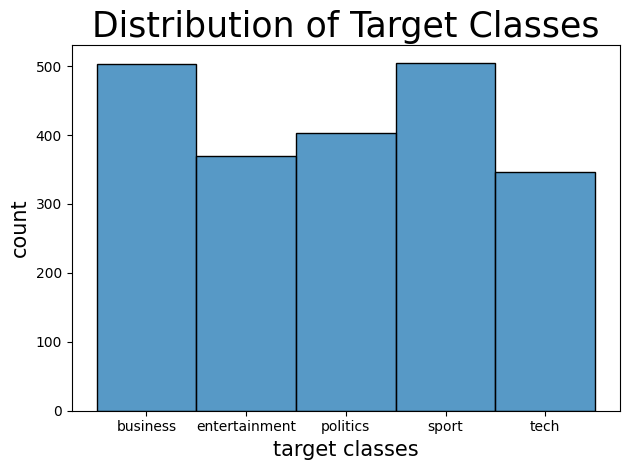

In [15]:
sns.histplot(data=original_data.labels)

plt.title('Distribution of Target Classes',fontsize=25)
plt.xlabel('target classes',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.tight_layout()

There are five target classes. They are fairly spread, their relative difference being less than 20-25%. This is why there is no need of resample them in order to get reliable predictions for the minority classes.

## **2.2 Text**

## **📝 Analyzing Sentence Count in Summarized Articles**

In this step, we calculate the number of sentences in the **text** column of the `data_summary` dataset.

- **`data_summary['no_sentences']`**: This new column stores the count of sentences in each article. We use a regular expression to identify sentence-ending punctuation marks (periods, exclamation points, and question marks).
  
Then, we compute the **average number of sentences** per article by class (i.e., per `labels`):
- **`avg_no_sentences`**: This DataFrame groups the data by article class (`labels`) and calculates the mean sentence count for each class. We sort the results in descending order to understand which classes have the longest average sentences.

This analysis helps in understanding the sentence complexity across different article classes.


In [16]:
# Number of sentences in the text column
data_summary['no_sentences'] = data_summary['text'].str.count('[\w][\.!\?]')

# Average number of sentences by article class
avg_no_sentences = (data_summary.groupby('labels')['no_sentences']
                    .mean().reset_index(name='avg. no. of sentences')
                    .sort_values(by='avg. no. of sentences', ascending=False))

## **📈 In-Depth Text Analysis by Article Category**

This section provides a detailed analysis of the **text characteristics** in the summarized BBC News dataset across different article classes (sport, business, politics, entertainment, and tech).

### 🔹 Top Row: Number of Words per Article
- Histograms display the **distribution of word counts** in articles by category.
- This helps identify how long or short articles tend to be within each class.

### 🔹 Middle Row: Average Word Length
- Using density plots, we visualize the **average length of words** used in each article, grouped by class.
- This gives insight into **text complexity** and vocabulary usage across topics.

### 🔹 Bottom Row: Sentence Statistics
- A bar plot shows the **average number of sentences** per article class.
- A boxplot illustrates the **distribution of sentence counts**, showing variability and outliers in sentence lengths within each category.

Together, these visualizations offer a rich understanding of the **structural differences** in summarized articles across various news topics.


<Figure size 1200x600 with 0 Axes>

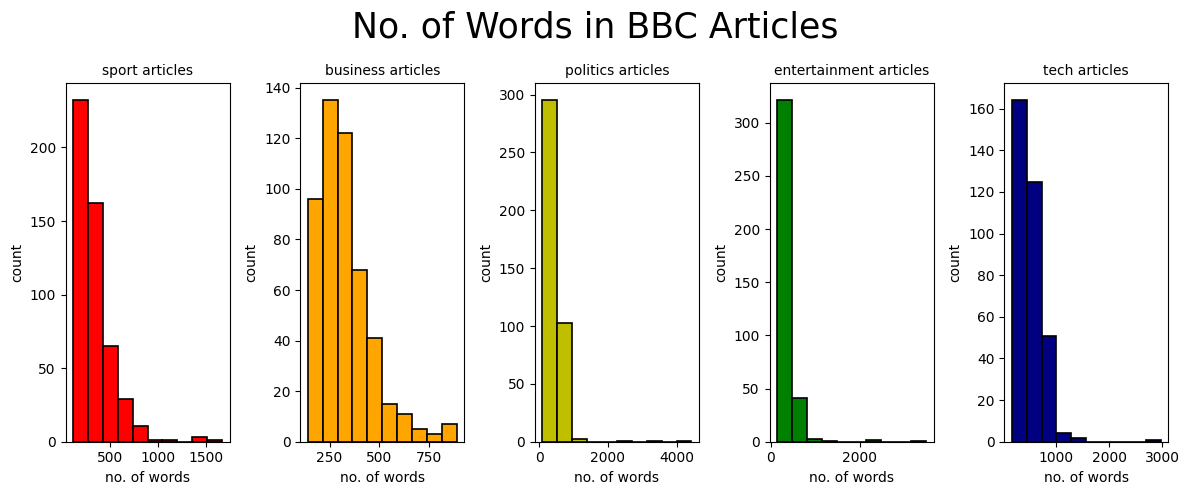

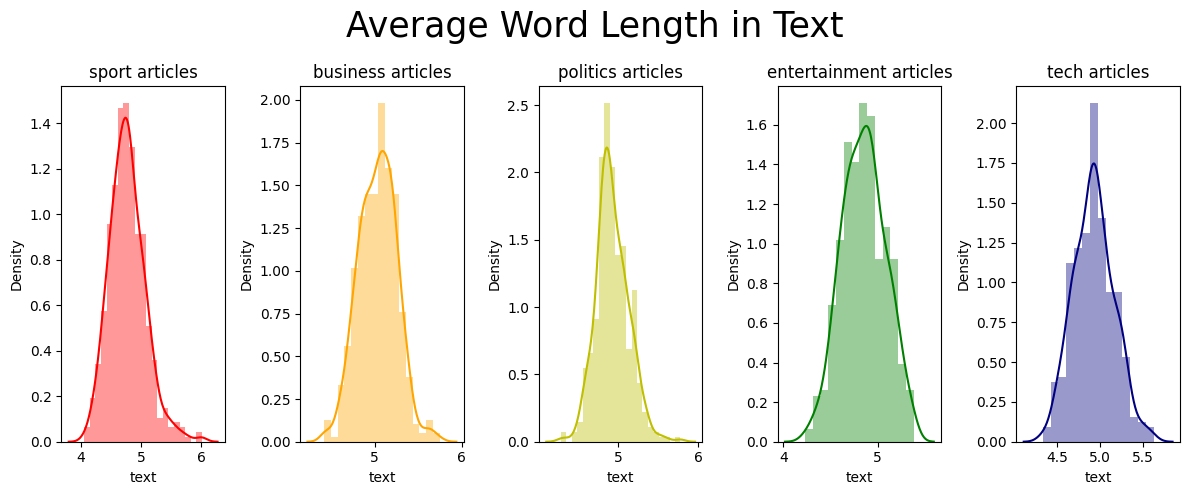

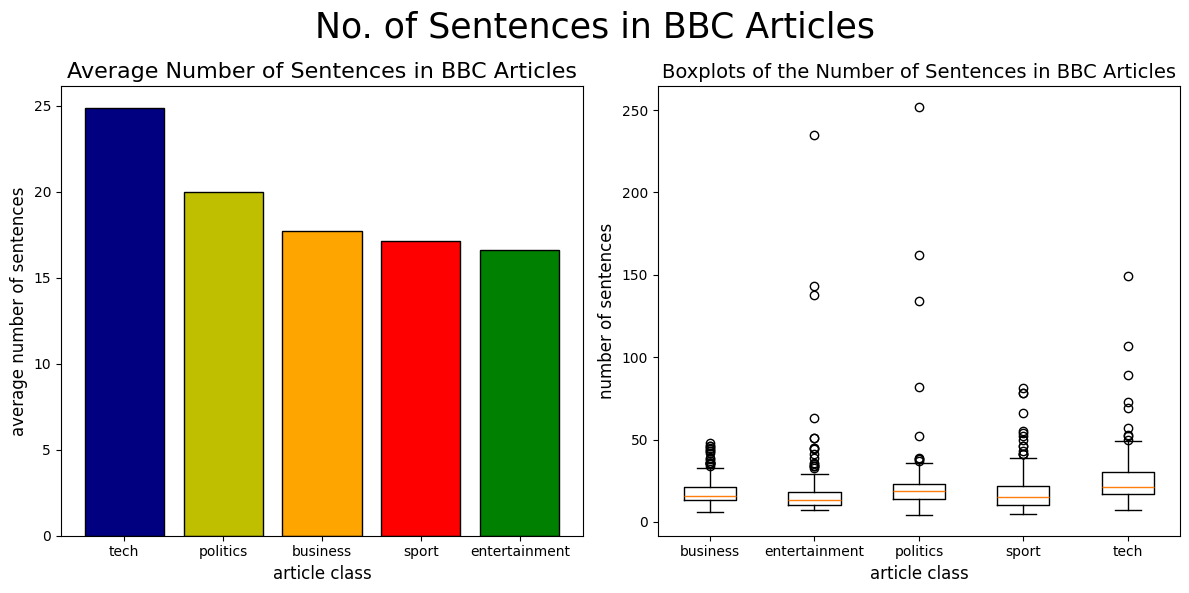

In [17]:
fig = plt.figure(figsize=(12,6))
(topfig,centralfig,bottomfig) = fig.subfigures(3,1)

### Top figures ###
topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

wd_len_sp = data_summary[data_summary['labels']=='sport']['text'].str.split().map(lambda x: len(x))
ax1.hist(wd_len_sp,color='red',edgecolor='black',linewidth=1.2)
ax1.set_title('sport articles',size=10)
ax1.set_xlabel('no. of words',size=10)
ax1.set_ylabel('count',size=10)

wd_len_bus = data_summary[data_summary['labels']=='business']['text'].str.split().map(lambda x: len(x))
ax2.hist(wd_len_bus,color='orange',edgecolor='black',linewidth=1.2)
ax2.set_title('business articles',size=10)
ax2.set_xlabel('no. of words',size=10)
ax2.set_ylabel('count',size=10)

wd_len_pol = data_summary[data_summary['labels']=='politics']['text'].str.split().map(lambda x: len(x))
ax3.hist(wd_len_pol,color='y',edgecolor='black',linewidth=1.2)
ax3.set_title('politics articles',size=10)
ax3.set_xlabel('no. of words',size=10)
ax3.set_ylabel('count',size=10)

wd_len_ent = data_summary[data_summary['labels']=='entertainment']['text'].str.split().map(lambda x: len(x))
ax4.hist(wd_len_ent,color='g',edgecolor='black',linewidth=1.2)
ax4.set_title('entertainment articles',size=10)
ax4.set_xlabel('no. of words',size=10)
ax4.set_ylabel('count',size=10)

wd_len_te = data_summary[data_summary['labels']=='tech']['text'].str.split().map(lambda x: len(x))
ax5.hist(wd_len_te,color='navy',edgecolor='black',linewidth=1.2)
ax5.set_title('tech articles',size=10)
ax5.set_xlabel('no. of words',size=10)
ax5.set_ylabel('count',size=10)

plt.suptitle("No. of Words in BBC Articles",size=25)
plt.tight_layout()

### Central figure ###
centralfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

char_len_sp = data_summary[data_summary['labels']=='sport']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_sp.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('sport articles',size=12)

char_len_bus = data_summary[data_summary['labels']=='business']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_bus.map(lambda x: np.mean(x)),ax=ax2,color='orange')
ax2.set_title('business articles',size=12)

char_len_pol = data_summary[data_summary['labels']=='politics']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_pol.map(lambda x: np.mean(x)),ax=ax3,color='y')
ax3.set_title('politics articles',size=12)

char_len_ent = data_summary[data_summary['labels']=='entertainment']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ent.map(lambda x: np.mean(x)),ax=ax4,color='g')
ax4.set_title('entertainment articles',size=12)

char_len_te = data_summary[data_summary['labels']=='tech']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_te.map(lambda x: np.mean(x)),ax=ax5,color='navy')
ax5.set_title('tech articles',size=12)

plt.suptitle("Average Word Length in Text",size=25)
plt.tight_layout()
plt.show()

### Bottom figure ###
bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.bar(data=avg_no_sentences,x='labels',height='avg. no. of sentences',color=['navy','y','orange','red','g'],edgecolor='black')
ax1.set_xlabel('article class',size=12)
ax1.set_ylabel('average number of sentences',size=12)
ax1.set_title('Average Number of Sentences in BBC Articles',fontsize=16)

grouped = data_summary.groupby('labels')['no_sentences']
ax2.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())
ax2.set_xlabel('article class',size=12)
ax2.set_ylabel('number of sentences',size=12)
ax2.set_title('Boxplots of the Number of Sentences in BBC Articles',fontsize=14)

plt.suptitle("No. of Sentences in BBC Articles",size=25)
plt.tight_layout()

plt.show()

## **📏 Average Word Count per Article Category**

In this step, we calculate the **average number of words** in articles for each class:

- Sport
- Business
- Politics
- Entertainment
- Tech

This analysis provides a numerical summary to complement the histograms shown earlier. It helps us understand which categories tend to have longer or shorter articles based on word count.


In [18]:
print(f'mean no. of words in sport articles: {wd_len_sp.mean():.1f}')
print(f'mean no. of words in business articles: {wd_len_bus.mean():.1f}')
print(f'mean no. of words in politics articles: {wd_len_pol.mean():.1f}')
print(f'mean no. of words in entertainment articles: {wd_len_ent.mean():.1f}')
print(f'mean no. of words in tech articles: {wd_len_te.mean():.1f}')

mean no. of words in sport articles: 330.6
mean no. of words in business articles: 328.7
mean no. of words in politics articles: 456.2
mean no. of words in entertainment articles: 332.7
mean no. of words in tech articles: 513.2


One can notice that there is a large difference between the total number of words depending on the article class. In particular, one can observe that politics and tech articles are on average longer than sport, business and entertainment articles. The last plots show that tech and politics articles have on average a larger number of sentences.

These differences might be explained by the articles' readability scores; see **Ref. 2**.

## **📚 Readability Analysis of BBC Articles by Category**

In this section, we evaluate the **readability** of summarized articles using two popular metrics:

### ✅ Flesch Reading Ease Score
- Indicates how easy a text is to read.
- Higher scores = easier to read; lower scores = more complex text.
- Reference lines help interpret the difficulty level (e.g., 70 = fairly easy, 50 = fairly difficult).

### ✅ Dale-Chall Readability Score
- Assesses text difficulty based on familiar vs. difficult words.
- Higher scores = more difficult content.
- Reference lines show expected comprehension level (e.g., 8 = suitable for 11th–12th-grade students).

### 📊 Visualization
- Bar charts show the **average score** for each article class.
- These insights help us compare which news categories are written in a simpler or more complex style, potentially impacting comprehension for different audiences.


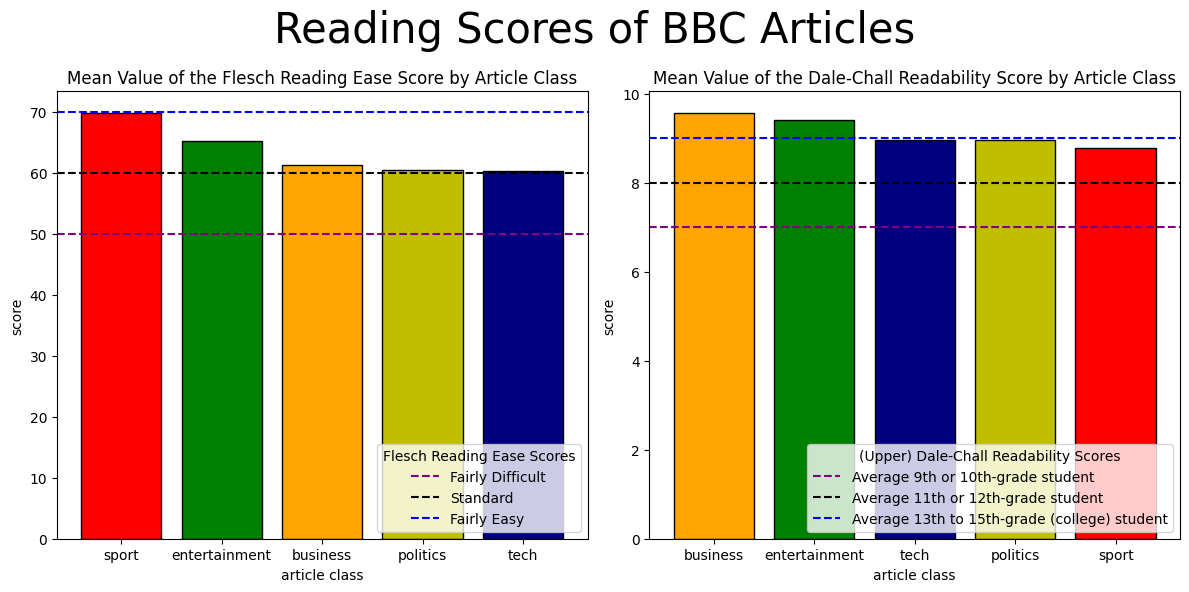

In [19]:
Dale_Chall = (data_summary.groupby('labels')['Dale-Chall Readability Score'].mean()
              .reset_index(name='mean Dale-Chall Readability Score')
              .sort_values(by='mean Dale-Chall Readability Score',ascending=False))

Flesch = (data_summary.groupby('labels')['Flesch Reading Ease Score'].mean()
          .reset_index(name='mean Flesch Reading Ease Score')
          .sort_values(by='mean Flesch Reading Ease Score',ascending=False))


fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.bar(data=Flesch,x='labels',height='mean Flesch Reading Ease Score',
        color=['red','g','orange','y','navy'],edgecolor='black')
ax1.axhline(y=50,color='purple',linestyle='--',label='Fairly Difficult')
ax1.axhline(y=60,color='black',linestyle='--',label='Standard')
ax1.axhline(y=70,color='b',linestyle='--',label='Fairly Easy')
ax1.set_title('Mean Value of the Flesch Reading Ease Score by Article Class')
ax1.set_xlabel('article class')
ax1.set_ylabel('score')
ax1.legend(loc='lower right',title='Flesch Reading Ease Scores')

ax2.bar(data=Dale_Chall,x='labels',height='mean Dale-Chall Readability Score',
        color=['orange','g','navy','y','red'],edgecolor='black')
ax2.axhline(y=7,color='purple',linestyle='--',
            label="Average 9th or 10th-grade student")
ax2.axhline(y=8,color='black',linestyle='--',
            label="Average 11th or 12th-grade student")
ax2.axhline(y=9,color='b',linestyle='--',
            label="Average 13th to 15th-grade (college) student")
ax2.set_title('Mean Value of the Dale-Chall Readability Score by Article Class')
ax2.set_xlabel('article class')
ax2.set_ylabel('score')
ax2.legend(loc='lower right',title='(Upper) Dale-Chall Readability Scores')

plt.suptitle('Reading Scores of BBC Articles',size=30)

plt.tight_layout()

These plots show that:
* According to the Flesch score, business, politics and tech articles are the most difficult to read. The Dale-Chall score shows that business and entertainment articles require (on average) a college student level education.

# **3. Text Classification with Word2Vec Embedding plus Classifier**
<a id="3"></a>

## **3.1 Classification of the 'Original' Dataset with Word2Vec**

## **🔤 Encoding Target Labels**

In this step, we use **Label Encoding** to convert the categorical target labels (e.g., 'business', 'sport') into numerical values.

- This is necessary because most machine learning models work only with **numerical input**, not strings.
- The `LabelEncoder` from `sklearn` assigns a unique integer to each category.

Now, the `'labels'` column in the original dataset is transformed into a format suitable for model training.


The first step of the whole process is to encode the target labels.

In [20]:
encoder = LabelEncoder()

original_data['labels'] = encoder.fit_transform(original_data['labels'])

Then, defining the `X` and `y` variables and performing the train-test split.

In [21]:
X = original_data['text']
y = original_data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488,), (639,), (1488,), (639,))

After doing this, I am filtering and tokenizing the data ...
## **🧹 Text Preprocessing Function**

Before feeding textual data into machine learning models, we need to clean and normalize it. This function handles the **preprocessing pipeline** as follows:

1. **Cleaning**: Removes non-alphabetic characters and converts all text to lowercase for uniformity.
2. **Tokenization**: Splits text into individual words using NLTK's `word_tokenize` (or falls back to `.split()` if needed).
3. **Stopword Removal & Stemming**:
   - Removes common English stopwords (e.g., "the", "and") that don't contribute meaningful information.
   - Applies stemming using the Snowball Stemmer to reduce words to their root form (e.g., "running" → "run").
4. **Rejoining**: Converts the cleaned list of words back into a single string.

Finally, the function is applied to both the training and test datasets, ensuring consistency in preprocessing.


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download necessary resources (do this only once)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Set up stopwords and stemmer
stop_words = set(stopwords.words('english'))
snowballstemmer = SnowballStemmer('english')

def preprocess(text):
    # Step 1: Remove non-alphabet characters and convert to lowercase
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()

    # Step 2: Tokenize text (use split if punkt download fails)
    try:
        from nltk.tokenize import word_tokenize
        words = word_tokenize(text)
    except LookupError:
        words = text.split()  # Fallback: split by whitespace if tokenization fails

    # Step 3: Remove stopwords and apply stemming
    words = [snowballstemmer.stem(word) for word in words if word not in stop_words]

    # Step 4: Reassemble the words into a clean string
    return ' '.join(words)

# Apply preprocessing to train and test datasets
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)


## **🧠 Training the Word2Vec Model**

We now train a **Word2Vec model** to generate dense vector representations (embeddings) of words based on their context in the corpus.

### 🔧 Parameters:
- `vector_size=100`: Each word will be represented by a 100-dimensional vector.
- `window=50`: Context window size — how many words before and after the current word to consider.
- `min_count=5`: Ignores all words with total frequency less than 5.

### 🧾 Input:
The input is a list of tokenized sentences from the training set. Each sentence is split into words.

This model learns word relationships and semantics from the training data, which we’ll later use to represent entire documents (articles) as vectors.


In [23]:
# Word2Vec model parameters
VECTOR_SIZE = 100
WINDOW = 50
MIN_COUNT = 5

sentences = [sentence.split() for sentence in X_train]

w2v_model = Word2Vec(sentences, vector_size=VECTOR_SIZE, window=WINDOW, min_count=MIN_COUNT)

## **✨ Vectorizing Text Using Word2Vec**

Now that we've trained the Word2Vec model, we need to convert each article (text) into a fixed-length numerical vector.

### 🧮 `vectorize()` Function:
- **Input**: A preprocessed article (string of words).
- **Process**:
  - Split the sentence into words.
  - For each word, retrieve its corresponding Word2Vec embedding (if available).
  - If no valid words are found, return a zero-vector.
  - Otherwise, compute the **average** of all word vectors in the article.
- **Output**: A `VECTOR_SIZE`-dimensional vector representing the full article.

This step transforms both `X_train` and `X_test` into NumPy arrays of vectorized articles, ready for classification.


In [24]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(VECTOR_SIZE)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test  = np.array([vectorize(sentence) for sentence in X_test])

Finally, I am training the classification models ...

In [25]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **📊 Evaluating the Random Forest Classifier**

We evaluate the performance of the trained **Random Forest** model using the following metrics:

- **Precision**: Measures how many of the predicted positive classes were actually correct.
- **Recall**: Measures how many of the actual positive classes were correctly predicted.
- **Accuracy**: Measures the overall correctness of the model's predictions.



In [26]:
y_pred_rf = rf.predict(X_test)

precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print('RandomForest / Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum()/len(y_pred_rf), 3)))

RandomForest / Precision: 0.949 / Recall: 0.953 / Accuracy: 0.951


In [27]:
y_pred_lr = clf.predict(X_test)

precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')
print('LogisticRegression / Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred_lr==y_test).sum()/len(y_pred_lr), 3)))

LogisticRegression / Precision: 0.948 / Recall: 0.949 / Accuracy: 0.95


A precious visualization tool to get a more general or clear picture of the results is the confusion matrix. I am plotting that of the random forest results on the test dataset.

## **🔍 Confusion Matrix (RandomForest)**

To better understand the performance of the **Random Forest Classifier** on different categories, we use a **confusion matrix**.

Each cell `[i, j]` in the matrix shows how often articles from class `i` were predicted as class `j`.



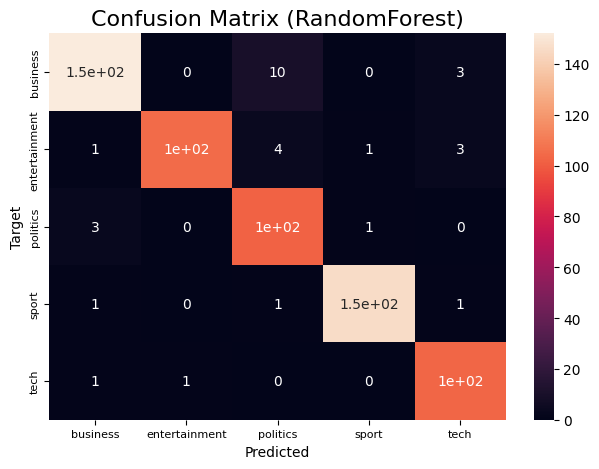

In [28]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (RandomForest)', fontsize=16)
ax.xaxis.set_ticklabels(['business','entertainment','politics','sport','tech'], fontsize=8)
ax.yaxis.set_ticklabels(['business','entertainment','politics','sport','tech'], fontsize=8)
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

## **3.2 Classification of the 'Summarized' Data**

This second dataset has two columns with summarized text: `lsa_summary` and `text_rank_summary`; see **Ref. 2**.
I will be using one of these columns (`lsa_summary`) to train another classification model that is basically the same as before. Only the input data changes.

I want to find out whether classifying the summarized data instead of the 'original' data can change the accuracy of the model.

In [29]:
data_summary.drop(['text', 'no_sentences', 'Flesch Reading Ease Score',
                   'Dale-Chall Readability Score', 'text_rank_summary'], axis=1, inplace=True)

data_summary['labels'] = encoder.fit_transform(data_summary['labels'])

In [30]:
X = data_summary['lsa_summary']
y = data_summary['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

X_train = X_train.apply(preprocess)
X_test  = X_test.apply(preprocess)

In [31]:
# Word2Vec model parameters
VECTOR_SIZE = 100
WINDOW = 50
MIN_COUNT = 6

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=VECTOR_SIZE, window=WINDOW, min_count=MIN_COUNT)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test  = np.array([vectorize(sentence) for sentence in X_test])

In [32]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')

print('RandomForest / Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum()/len(y_pred_rf), 3)))

y_pred_lr = clf.predict(X_test)

precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')
print('LogisticRegression / Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred_lr==y_test).sum()/len(y_pred_lr), 3)))

RandomForest / Precision: 0.772 / Recall: 0.763 / Accuracy: 0.772
LogisticRegression / Precision: 0.348 / Recall: 0.349 / Accuracy: 0.401


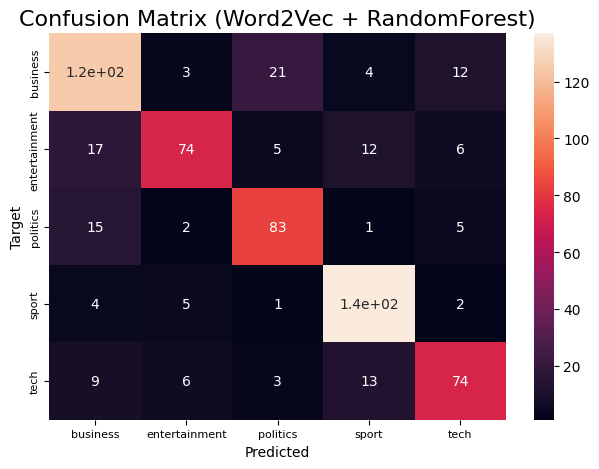

In [33]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (Word2Vec + RandomForest)', fontsize=16)
ax.xaxis.set_ticklabels(['business','entertainment','politics','sport','tech'], fontsize=8)
ax.yaxis.set_ticklabels(['business','entertainment','politics','sport','tech'], fontsize=8)
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

# References

1. Jacopo Ferretti, [*BBC News Classification with CountVectorizer and CNNs*](https://www.kaggle.com/code/jacopoferretti/bbc-news-classification-w-countvectorizer-cnns), notebook on Kaggle.
2. Jacopo Ferretti, [*BBC News: Text Complexity and Summarization*](https://www.kaggle.com/code/jacopoferretti/bbc-news-text-complexity-and-summarization), notebook on Kaggle.
3. Raj Mehrotra, [*A Complete Text Classfication Guide(Word2Vec+LSTM)*](https://www.kaggle.com/code/rajmehra03/a-complete-text-classfication-guide-word2vec-lstm/notebook), notebook on Kaggle.
4. Neri Van Otten, [*Tutorial TF-IDF vs Word2Vec For Text Classification [How To In Python With And Without CNN]*](https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/), article on spotintelligence.com.